In [39]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import Adam,SGD   
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from keras import regularizers

In [23]:
#load data
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

In [24]:
#normalisation
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [25]:
#to categorical
print(f"before label is {y_train[0]}")
y_train = to_categorical(y_train)
print(f"after label is {y_train[0]}")
y_test = to_categorical(y_test)

before label is 9
after label is [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


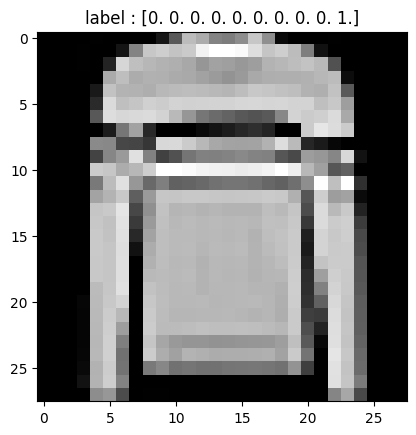

In [26]:
#visulaise the dataset
plt.imshow(x_train[5],cmap='gray')
plt.title(f"label : {y_train[0]}")
plt.show()

In [30]:
#architecture of model
model = Sequential()
model.add(Flatten())
model.add(Dense(256,'relu'))
model.add(Dense(128,'relu'))
model.add(Dense(64,'relu'))
model.add(Dense(10,'softmax'))       #10 neurons last layer


In [31]:
#compile 
model.compile(optimizer=SGD(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [32]:
#train model
result = model.fit(x_train,y_train,epochs=10,batch_size=32,validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5340 - loss: 1.5998 - val_accuracy: 0.6688 - val_loss: 1.0699
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6937 - loss: 0.9123 - val_accuracy: 0.7244 - val_loss: 0.7965
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7446 - loss: 0.7447 - val_accuracy: 0.7638 - val_loss: 0.6927
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7755 - loss: 0.6619 - val_accuracy: 0.7858 - val_loss: 0.6284
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7968 - loss: 0.6060 - val_accuracy: 0.7986 - val_loss: 0.5874
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8098 - loss: 0.5672 - val_accuracy: 0.8113 - val_loss: 0.5549
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8183 - loss: 0.5396 - val_accuracy: 0.8180 - val_loss: 0.5322
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8244 - loss: 0.5184 - 

In [34]:
#Evaluate
loss,accuracy = model.evaluate(x_test,y_test)
print(f"test loss:{loss}")
print(f"test accuracy:{accuracy}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8245 - loss: 0.5076
test loss:0.5076112151145935
test accuracy:0.8245000243186951


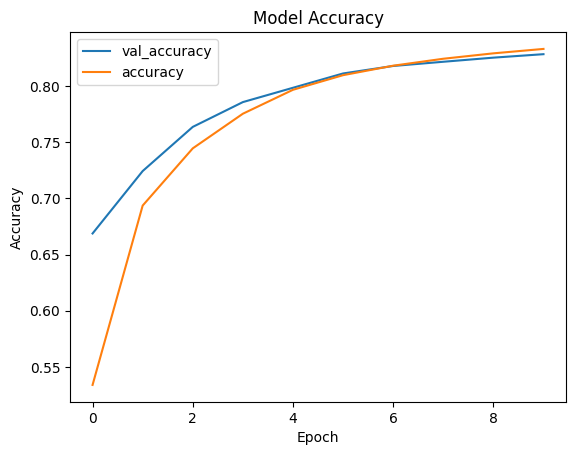

In [35]:
plt.plot(result.history['val_accuracy'],label='val_accuracy')
plt.plot(result.history['accuracy'] ,label='accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Model 2 with L2 regulariser (1e-4) and drop out 


In [ ]:
#architecture of model
model_le4 = Sequential()
model_le4.add(Flatten(input_shape=(28,28)))
model_le4.add(Dense(512,'relu',kernel_regularizer=regularizers.l2(1e-4)))
model_le4.add(Dense(256,'relu',kernel_regularizer=regularizers.l2(1e-4)))
model_le4.add(Dense(128,'relu',kernel_regularizer=regularizers.l2(1e-4)))
model_le4.add(Dense(64,'relu',kernel_regularizer=regularizers.l2(1e-4)))
model_le4.add(Dense(100,'softmax'))       #10 neurons last layer


/home/praneeth/Documents/Super60/venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [38]:
#compile 
model_le4.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])